In [1]:
import env
import actor
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
path_to_data = 'train.xlsx'
environment = env.DataCenterEnv(path_to_data)
print(environment.price_values.shape)

(1096, 24)


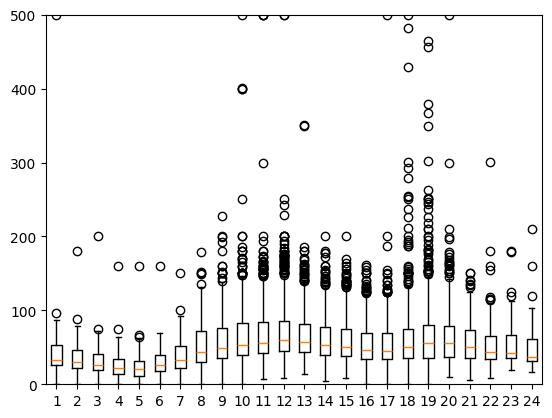

In [3]:
plt.boxplot(environment.price_values)
plt.ylim(0,500)
plt.show()

In [4]:
# Parameters
alpha = 0.1  # Learning rate
gamma = 1  # Discount factor
epsilon = 1  # Exploration rate (start)
epsilon_decay_rate = 0.999
min_epsilon_rate = 0.1
num_bins_price = 21  # Discretization bins for price
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
        110, 120, 130, 140, 150, 160, 170, 180, 190, 200, float('inf')]
num_hours = 24
actions = [-1, -0.5, 0, 0.5, 1]  # Discrete actions
num_episodes = 100
max_steps = len(environment.timestamps)

In [5]:
Q = np.zeros((num_bins_price, num_hours, len(actions)))

In [15]:
aggregate_reward = 0
for episode in range(num_episodes):
    state = environment.reset()
    for t in range(max_steps):
        # Choose action using epsilon-greedy policy
        _, price, hour, _ = state
        price_bin_index = np.digitize(price, bins) - 1
        hour_index = int(hour-1)
        if np.random.rand() < epsilon:
            action_idx = random.randrange(len(actions)) # Explore
        else:
            action_idx = np.argmax(Q[price_bin_index, hour_index, :]) # Exploit

        # Take action, observe reward and next state
        action = actions[action_idx]
        next_state, reward, terminated = environment.step(action)
        aggregate_reward += reward
        _, next_price, next_hour, _ = next_state
        next_price_bin_index = np.digitize(next_price, bins) - 1
        next_hour_index = int(next_hour-1)

        # Update Q-value
        best_next_action = np.argmax(Q[next_price_bin_index, next_hour_index, :])
        Q[price_bin_index, hour_index, action_idx] += alpha * (reward + gamma * Q[next_price_bin_index, next_hour_index, best_next_action] - Q[price_bin_index, hour_index, action_idx])

        # Transition to next state
        state = next_state

        # Update epsilon value
        epsilon = epsilon * epsilon_decay_rate
        if epsilon < min_epsilon_rate:
            epsilon = min_epsilon_rate

In [16]:
mean_aggregate_reward = aggregate_reward / num_episodes
mean_aggregate_reward

np.float64(-220040.34990000218)

In [ ]:
# Test the Q-learning agent
num_test_episodes = 10  # Number of test episodes
total_rewards = []

for episode in range(num_test_episodes):
    state = environment.reset()
    episode_reward = 0

    for t in range(max_steps):
        # Extract state variables
        _, price, hour, _ = state
        price_bin_index = np.digitize(price, bins) - 1
        hour_index = int(hour-1)

        # Select the best action (greedy policy)
        best_action_index = np.argmax(Q[price_bin_index, hour_index, :])
        best_action = actions[best_action_index]

        # Take the action
        next_state, reward, terminated = environment.step(best_action)
        #print(reward)
        episode_reward += reward

        # Transition to the next state
        state = next_state

        # Check termination
        if terminated:
            break

    # Record total reward for this episode
    total_rewards.append(episode_reward)

# Calculate average reward over test episodes
average_test_reward = np.mean(total_rewards)
print("Average Test Reward:", average_test_reward)


0.0
0.0
0.0
0.0
-0.1
-0.1
-0.0
0.04000000000000001
-0.0
-31.549999999999997
-0.0
-0.0
-0.0
-70.05
-75.0
-100.0
-81.7
-277.7
-379.90000000000003
-331.1
-379.90000000000003
-330.0
-364.79999999999995
-306.5
0.0
0.0
-45.05
30.0
-90.0
-74.5
132.0
-0.0
119.84000000000002
158.4
-0.0
-499.3
-0.0
-460.09999999999997
-375.7
-364.5
-379.90000000000003
-530.0
-596.9
-500.90000000000003
-500.0
-362.2
-310.9
-298.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-499.90000000000003
-470.0
-432.1
-439.90000000000003
-480.0
-570.0
-609.9
-555.1
-517.7
-345.09999999999997
-393.1
-380.5
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-459.6
-0.0
-423.5
-400.09999999999997
-380.0
-426.59999999999997
-530.0
-589.9
-535.0
-440.09999999999997
-350.0
-344.6
-315.7
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-498.40000000000003
-0.0
-479.4
-400.6
-380.0
-386.1
-498.40000000000003
-530.0
-459.09999999999997
-367.40000000000003
-296.1
-306.1
-275.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
0.0
-0.0
-159.95
-0.0
